# Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Which team won the maximum and minimum matches?](#section401)<br/>
    - 4.2 [What is Margin of victory by Runs and wickets?](#section402)<br/>
    - 4.3 [How many times toss winning team won the match?](#section403)<br/>
    - 4.4 [How frequent team choose bat or field on toss?](#section404)<br/>
    - 4.5 [Team won who chose bat or field on toss decisions.](#section405)<br/>
    - 4.6 [Top 10 players who won Man of the match Title.](#section406)<br/>
    - 4.7 [Venue wise analysis of choosing bat or bowl first.](#section407)<br/>
    - 4.8 [Match Decision based on toss decision.](#section408)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>

### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 


<a id=section2></a>

### 2. Data Loading and Description
![Indian Premier League](Indian_Premier_League_Logo.png)

#### Background
- The Indian Premier League is a professional __Twenty20 cricket league__ in India contested during March or April and May of every year by __8 teams__ representing eight different cities in India.

#### Importing packages   

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

## Importing the dataset

In [2]:
matches = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv")

<a id=section3></a>

## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 Understanding the Dataset

In [3]:
matches.shape

(696, 18)

IPL matches dataset has __696 rows and 18 columns__. 

In [4]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
691,7949,2018,Pune,20/05/18,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,L Ngidi,Maharashtra Cricket Association Stadium,Nitin Menon,Yeshwant Barde,Marais Erasmus
692,7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi
693,7951,2018,Kolkata,23/05/18,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,25,0,AD Russell,Eden Gardens,Nitin Menon,Anil Chaudhary,Kumar Dharmasena
694,7952,2018,Kolkata,25/05/18,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,14,0,Rashid Khan,Eden Gardens,Nitin Menon,Kumar Dharmasena,Anil Chaudhary
695,7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon


In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [8]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

From the above we can see that __upmire3__ has __max null values 636__.

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [9]:
profile = pandas_profiling.ProfileReport(matches)
profile.to_file(outputfile="IPL_matches_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __IPL_matches_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Introducing a new column match_result with value won if toss winner is also match winner otherwise lost.
    - Adding 'Dubai' in all missing city columns as all matches played in Dubai International Stadium.
    - Droping umpire3 column as more than 90% data is missing.
    - dropping rows for mataches with No-Result.

In [10]:
matches['match_result'] = matches.apply(lambda x: 'won' if x['winner'] == x['toss_winner'] else 'loss',axis=1)

In [11]:
matches.city.fillna("Dubai", inplace = True) #adding missing values with Dubai as venue for matches is Dubai.

In [12]:
matches.drop("umpire3", axis=1, inplace=True) #Droping umpire3 column as more than 90% data is missing.

In [13]:
matches.drop(matches[matches.winner.isnull()].index, inplace=True) # Dropping rows with winner NaN or NO Result matches

## 3.4 Post Pandas Profiling

In [14]:
profile = pandas_profiling.ProfileReport(matches)
profile.to_file(outputfile="IPL_matches_after_preprocessing.html")

Now we have preprocessed the data, now the dataset doesnot contain missing values. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e __IPL_matches_after_preprocessing.html__ and IPL_matches_before_preprocessing.html.<br/>
In IPL_matches_after_preprocessing.html report, observations:
- In the Dataset info, Total __Missing(%)__ = __0.0%__ 
- Number of __variables__ = __17__ 

In [15]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,match_result
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,loss
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,won
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,won
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,won
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,won


<a id=section4></a>

<a id=section4></a>

### 4. Questions

<a id=section401></a>

### 4.1 Which team won the maximum and minimum matches.

- using countplot

Text(0.5, 1.0, 'count plot for winners')

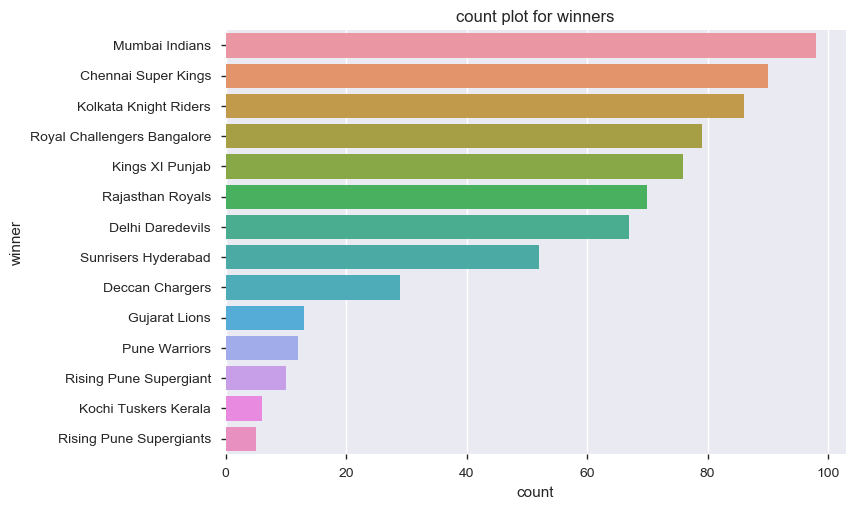

In [16]:
sns.countplot(y="winner", data=matches, order=matches['winner'].value_counts().index).set_title("count plot for winners")

you can see __Mumbai Indians__ has won maximum matches so far.

- using group by

In [17]:
matches.groupby(["winner"])["winner"].count().nlargest(10)

winner
Mumbai Indians                 98
Chennai Super Kings            90
Kolkata Knight Riders          86
Royal Challengers Bangalore    79
Kings XI Punjab                76
Rajasthan Royals               70
Delhi Daredevils               67
Sunrisers Hyderabad            52
Deccan Chargers                29
Gujarat Lions                  13
Name: winner, dtype: int64

- Notice that Mumbai Inidan won __98__ Matches, after that Chennai super kings is on second place with __90__.

<a id=section402></a>

### 4.2 What is Margin of victory by Runs and wickets.

Text(0.5, 1.0, 'Margin of victory by Runs')

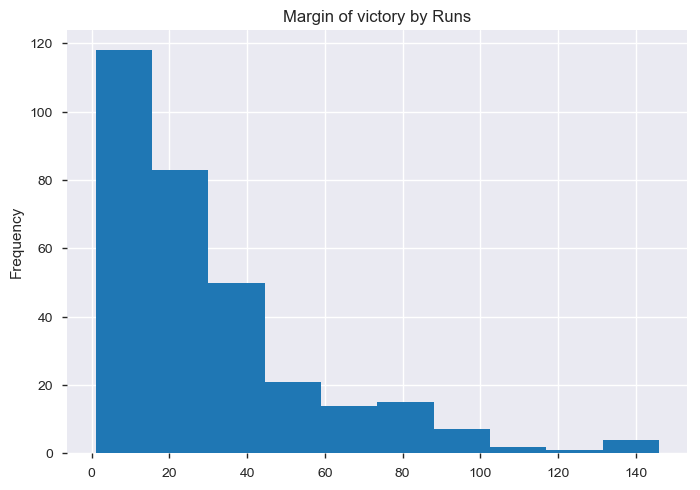

In [18]:
matches[matches["win_by_runs"] > 0]["win_by_runs"].plot.hist().set_title("Margin of victory by Runs")


- Most victories are in range of __1-40 runs__.

Text(0.5, 1.0, 'Margin of Victory by Wickets')

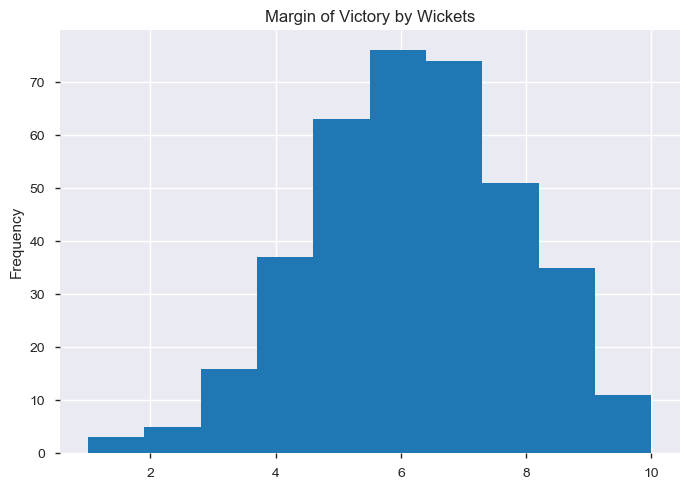

In [19]:
matches[matches["win_by_wickets"] > 0]["win_by_wickets"].plot.hist().set_title("Margin of Victory by Wickets")

- Most victories in chasing are between __5-7 wickets__. 

<a id=section403></a>

### 4.3 How many times toss winning team won the match.

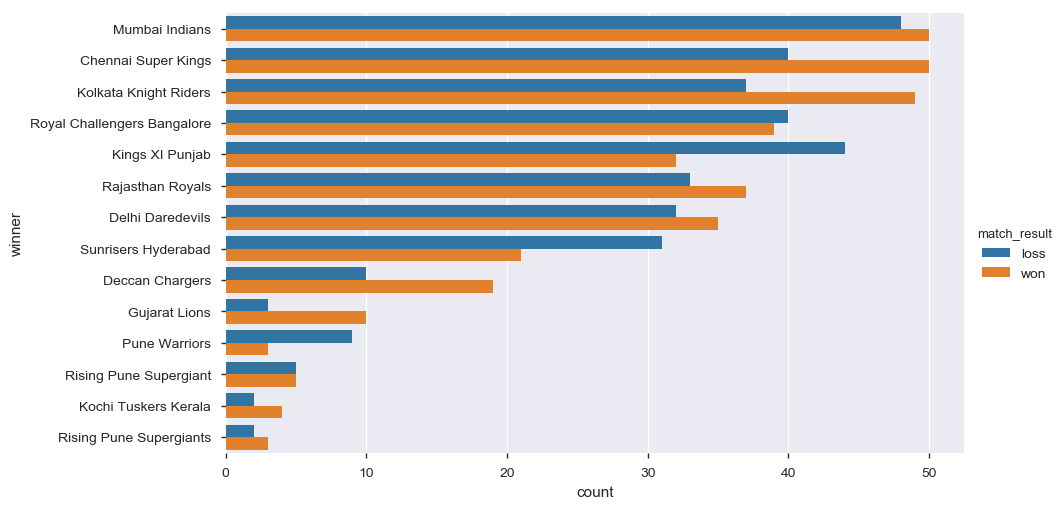

In [20]:
sns.catplot(y="winner", hue="match_result", kind='count',height=5, aspect=2, data=matches, order=matches['winner'].value_counts().index)

- This clearly stats that the toss winning team has better chance to win. __Kings XI Punjab__ is exception there.

<a id=section404></a>

### 4.4 How frequent team choose bat or field on toss.

Text(0.5, 1.0, 'Bat Vs Field on toss')

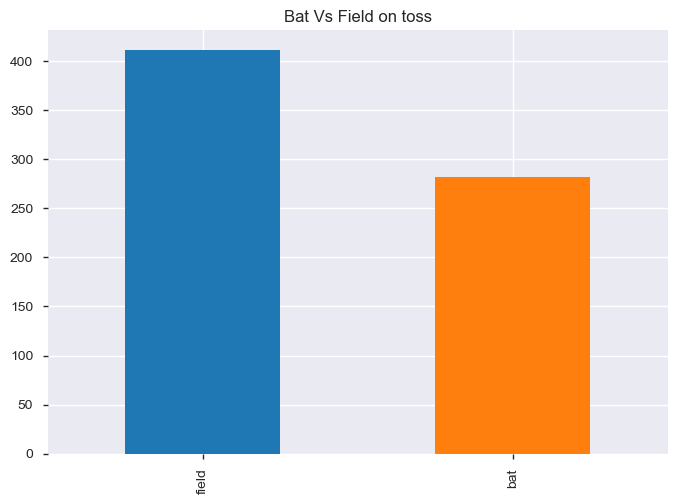

In [21]:
matches["toss_decision"].value_counts().plot.bar().set_title("Bat Vs Field on toss")

- Mostly toss winner teams prefer __Field__ first than __Batting__.

In [22]:
matches["toss_decision"].value_counts()/matches["toss_decision"].count()*100

field    59.307359
bat      40.692641
Name: toss_decision, dtype: float64

- Around 60% of team chooses Bowling over batting.

<a section=405></a>

### 4.5 Team won who chose bat or field on toss decisions.

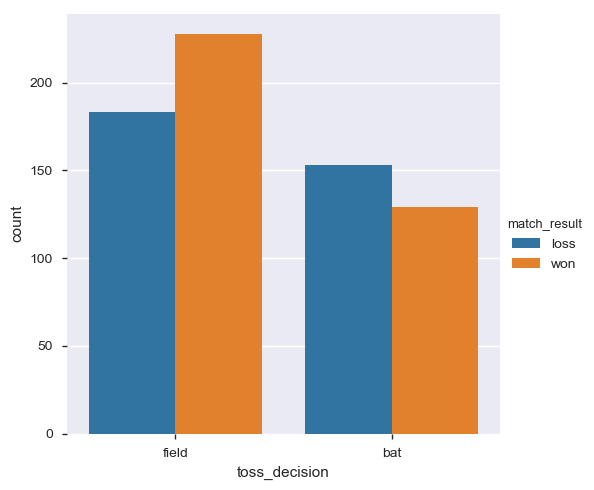

In [23]:
sns.catplot("toss_decision", hue="match_result" ,kind='count', data=matches)

- Team who chooses __Field__ has better possiblity of __winning__. 

<a id=section406></a>

### 4.6 Top 10 players who won Man of the match Title.

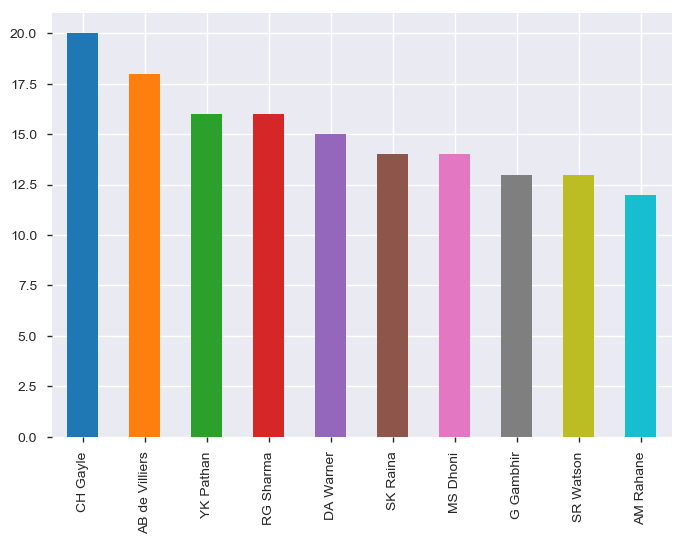

In [24]:
matches.player_of_match.value_counts().head(10).plot.bar()

<a id=section407></a>

### 4.7 Venue wise analysis of choosing bat or bowl first.

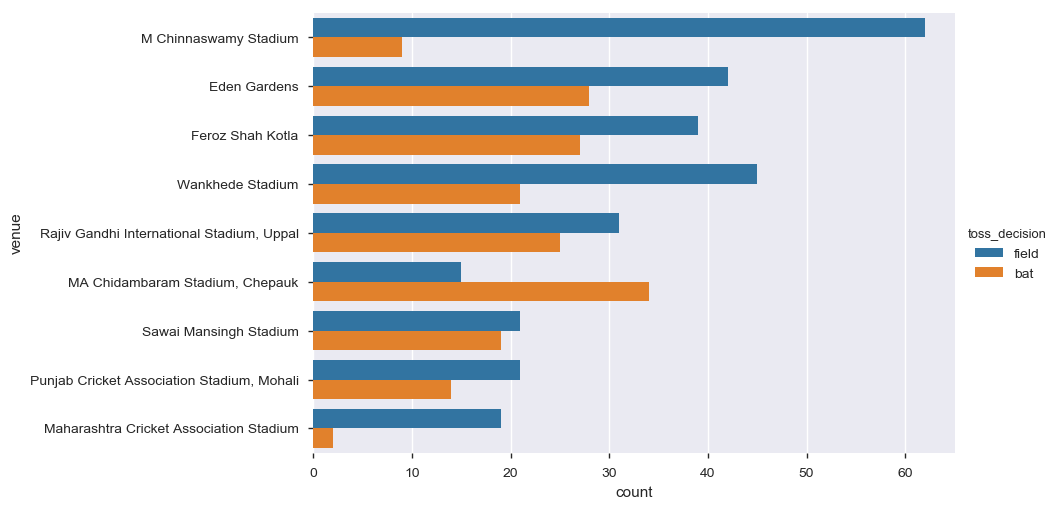

In [25]:
sns.catplot(y="venue", hue="toss_decision" ,kind='count',height=5, aspect=2, 
            data=matches[matches.groupby(["venue"])["venue"].transform('size')>20],
           order=matches[matches.groupby(["venue"])["venue"].transform('size')>20]["venue"].value_counts().index)

- It States that in most of the venues team chooses bowl first. and __M Chinnaswamy__ is on top. __MA Chidambaram__ is exception when team chooses bat first.

<a id=section408></a>

### 4.8 Match Decision based on toss decision.

In [26]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

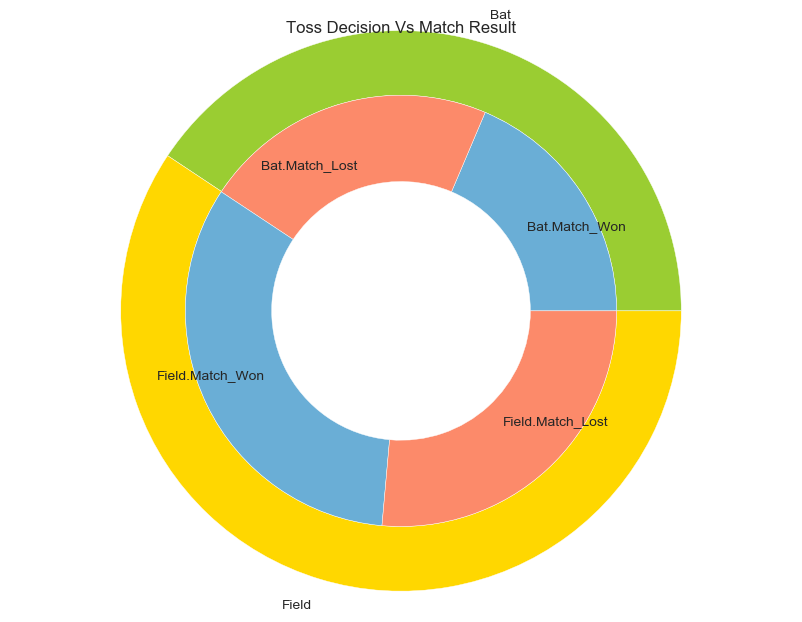

In [27]:
import matplotlib.pyplot as plt
 
# Make data: 
group_names=['Bat', 'Field']
group_size=[283,413]
subgroup_names=['Bat.Match_Won','Bat.Match_Lost','Field.Match_Won','Field.Match_Lost']
subgroup_size=[129,153,228,183]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=0.3, edgecolor='white')

# wedges, texts, autotexts = ax.pie(group_size, autopct=lambda pct: func(pct, data),
                                  #textprops=dict(color="w"))
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.4), a(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.title("Toss Decision Vs Match Result")
# show it
plt.show()

- This Donut plot stats that more teams choose __Field__ over __Bat__ on toss winning. Also team winning % is more wgen they choose field

<a id=section5></a>

### Conclusion

- Mumbai Indian and Chennai Super Kings are top two teams.
- Toss winning team chooses Field mostly also chasing team has won better winning percentage.
- Victory margin ranges between __1-40__ runs and __4-5__ wickets.
- CH Gayle, AB de Villiers , Rohit Sharma are top players Won __Man of the Match__ many times.